<a href="https://colab.research.google.com/github/nickzherdev/hpc_python/blob/master/t8_Shifting_Nikolay_Zherdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <small> <i>Task 8.</small> </i> Columnwise shifted pictures 

* Divide a picture into roughly equal blocks of columns. Each process takes its own block. The number of columns $N$ is not equal to the number of processes $n_p$, i.e., $N \ne n_p$ in general.
* Create $N$ new pictures by cyclically shifting the columns of pixels. E.g., for $N = 3 $: $[c_0, c_1, c_2] \rightarrow [c_2, c_0, c_1] \rightarrow [c_1, c_2, c_0]$

In [0]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [0]:
# def plot_img(X, Y):
#     plt.figure(figsize=(16,8))
#     plt.scatter(X, Y, s=0.05, c='red')
#     plt.savefig("img.png")
#     plt.show()

# plot_img(x, y)

# from IPython.display import Image
# Image("img.png", width=800, height=800)

(768, 1024)


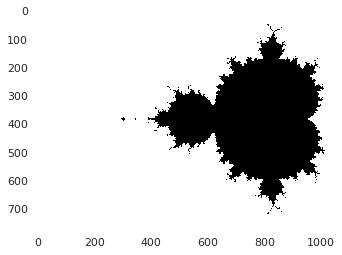

In [15]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = plt.imread("https://upload.wikimedia.org/wikipedia/en/e/ef/Mandelbrot_black_itr20.png")
gray = rgb2gray(img)
print(gray.shape)
plt.imshow(gray, cmap = plt.get_cmap('gray'))

plt.grid(False)
plt.savefig('greyscale.png')
plt.show()



* Create $N$ new pictures by cyclically shifting the columns of pixels. E.g., for $N = 3 $: $[c_0, c_1, c_2] \rightarrow [c_2, c_0, c_1] \rightarrow [c_1, c_2, c_0]$

In [13]:
c0 = np.ones((5, 2))
c1 = np.ones((5, 2)) * 2
c01 = np.hstack((c0, c1))

np.roll(c01, 4, axis=1)

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [1., 1., 2., 2.]])

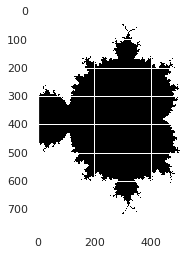

In [23]:
width = gray.shape[1]
middle = int(width/2)
block1 = gray[:, 0:middle]
block2 = gray[:, middle:]

plt.imshow(block2, cmap = plt.get_cmap('gray'))
plt.show()

In [38]:
ghost = np.zeros(gray.shape[0])[:, np.newaxis]
# block2
ghost.shape
goasted_b1 = np.hstack((ghost, block1))
goasted_b2 = np.hstack((ghost, block2))
goasted_b2

array([[0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03],
       [0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03],
       [0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03],
       ...,
       [0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03],
       [0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03],
       [0.  , 1.03, 1.03, ..., 1.03, 1.03, 1.03]])

In [50]:
# for column in range()
a = np.arange(5)
print(a[::-1])

[4 3 2 1 0]


In [0]:
import numpy as np

In [47]:
a = range(5)
for i in range(5, 1, -1):
    print(i)

5
4
3
2


In [0]:


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

blocks = np.linspace(r_start, r_end, grid_size)

my_grid_size = int(grid_size / size)
my_r_start_ind = int(rank * my_grid_size)
my_r_end_ind = int((rank+1) * my_grid_size-1)

my_r_start = vals_of_r[my_r_start_ind]
my_r_end = vals_of_r[my_r_end_ind]

my_start = 
my_end = 


In [0]:
# height = 50
# columns = 3
# ratio = int(height / columns)
# white = np.ones((height, height), dtype=np.float)
# for i in range(1, columns):
#     white[:, i:i*ratio] /= 2

# # plt.imshow(white, cmap='gray', vmin=0, vmax=1)
# plt.imshow(white, cmap="Blues")
# plt.grid(False)

### T8.1 	We can arbitrarily choose the number of MPI processes that we want to launch and it does not depend on the width of the picture (in pixels).

### T8.2 	Speedup versus number of processors graph is plotted.

### T8.3 Total memory consumption versus number of processors is plotted.